In [1]:
import openturns as ot

In [2]:
rosenbrock = ot.SymbolicFunction(['x1', 'x2'], 
                                 ['(1-x1)^2+100*(x2-x1^2)^2'])

In [3]:
x0 = ot.Point([-1.0, 1.0])

In [4]:
xexact = ot.Point([1.0, 1.0])

In [5]:
lowerbound = [-2.0, -2.0]
upperbound = [2.0, 2.0]
interval = ot.Interval(lowerbound, upperbound)

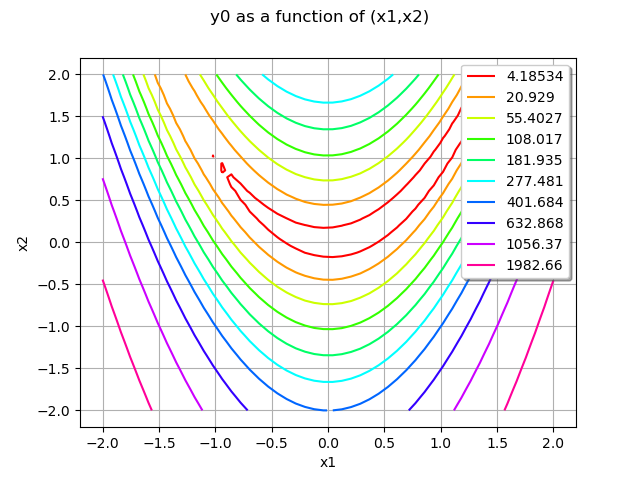

In [6]:
rosenbrock.draw(lowerbound, upperbound, [50]*2)

In [7]:
problem = ot.OptimizationProblem(rosenbrock)

In [8]:
algo = ot.Cobyla(problem)
algo.setMaximumRelativeError(1.e-1)
algo.setMaximumEvaluationNumber(50000)
algo.setStartingPoint(x0)
algo.run()

In [9]:
result = algo.getResult()

In [10]:
xoptim = result.getOptimalPoint()
xoptim

class=Point name=Unnamed dimension=2 values=[0.99251,0.985022]

In [11]:
delta = xexact - xoptim
absoluteError = delta.norm()
absoluteError

0.016745946097259285

In [12]:
result.getOptimalValue()

class=Point name=Unnamed dimension=1 values=[5.6392e-05]

In [13]:
result.getEvaluationNumber()

10520

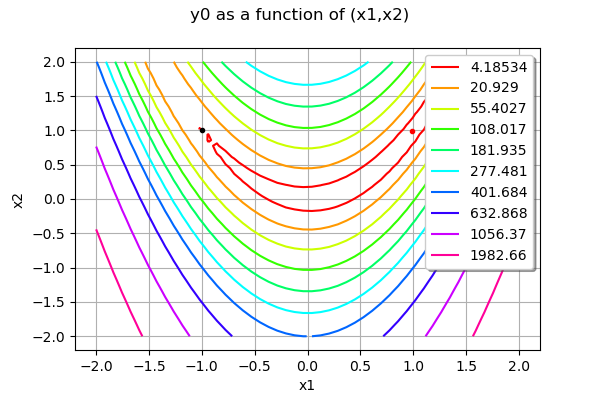

In [14]:
graph = rosenbrock.draw(lowerbound, upperbound, [50]*2)
cloud = ot.Cloud(ot.Sample([x0]))
cloud.setColor("black")
cloud.setPointStyle("bullet")
graph.add(cloud)
cloud = ot.Cloud(ot.Sample([xoptim]))
cloud.setColor("red")
cloud.setPointStyle("bullet")
graph.add(cloud)
graph

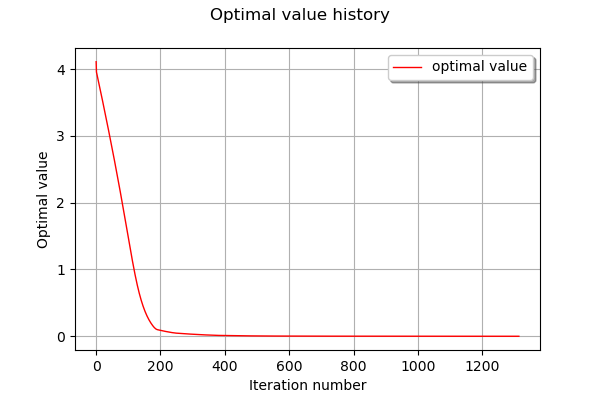

In [15]:
result.drawOptimalValueHistory()

In [16]:
inputSample = result.getInputSample()

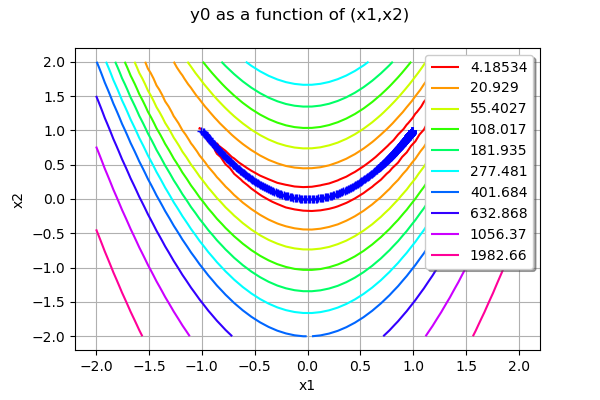

In [17]:
graph = rosenbrock.draw(lowerbound, upperbound, [50]*2)
cloud = ot.Cloud(inputSample)
graph.add(cloud)
graph

In [ ]:
bounds = ot.Interval([-3.0] * dim, [3.0] * dim)
problem = ot.OptimizationProblem(myFunction)
problem.setBounds(bounds)
solver = ot.TNC(problem)
startingPoints = ot.Normal(dim).getSample(3)
algo = ot.MultiStart(solver, startingPoints)
algo.run()
result = algo.getResult()